## Quiz #0401

### "Optimal number of clusters for K-means clustering"

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Answer the following question by providing Python code:

In [60]:
# We will use simulated data.
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Define a function that calculates the "total internal sum of squares".
- X         :   Data.
- centers   :   Array that contains the centroid coordinates. Calculated by kmeans.
- clusters  :   Array of cluster labels. Calculated by kmeans. <br> <br>
HINT: Implement the formula from the lecture note.

In [61]:
def total_internal_ss(X, centers, clusters):

     N_clusters = centers.shape[0]
     N_columns = centers.shape[1]
     N_rows = X.shape[0]

     internal_ss = np.zeros(N_clusters)
     
     for i in range(N_clusters):
          internal_ss[i] = np.sum(np.square(X[clusters == i] - centers[i]))

     return np.sum(internal_ss)

2). Visualize as a Scatter plot the "total internal sum of squares" vs N# of clusters. 
- Then, determine the optimal number of clusters.
- Is this number the same as expected?

In [62]:
n_cluster = np.array(range(2,10))                   # Array that contains the number of clusters.
total_ss = np.array([])                          # Array that will contain the total internal sum of squares.

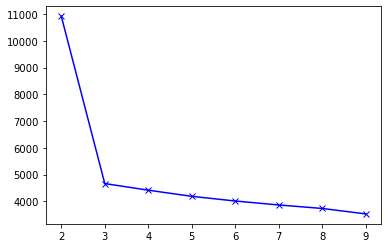

In [63]:
# reinitialize total_ss in case we re-run the loop
total_ss = np.array([]) 

for k in n_cluster:
  # fitting with k means
  km=KMeans(n_clusters=k)
  km.fit(X)

  # calculating the sum of squares
  ss = total_internal_ss(X, km.cluster_centers_, km.labels_)
  total_ss = np.append(total_ss, ss)

# plotting the sum of squares
plt.plot(range(2,10),total_ss,'bx-')

# Optimal number of clusters
The optimal number of clusters should be k = 3 since the sse drops at k = 3 and then decreases steadily

The number of clusters is the same as expected since we specified k=3 number of clusters in the make_blobs function 